### Задание

1. Скачайте материалы к занятию.  
2. Проанализируйте ряды и сделайте их стационарными.  
3. Пришлите решение в виде ссылки на GitHub с ноутбуком.  

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats import boxcox



### Выпешем нужные функции для анализа

In [53]:

###############
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [54]:
# Функция для коррелограмм

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [72]:
# Функция для поиска сезонности

def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')


### Загрузим датасеты

In [10]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [11]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

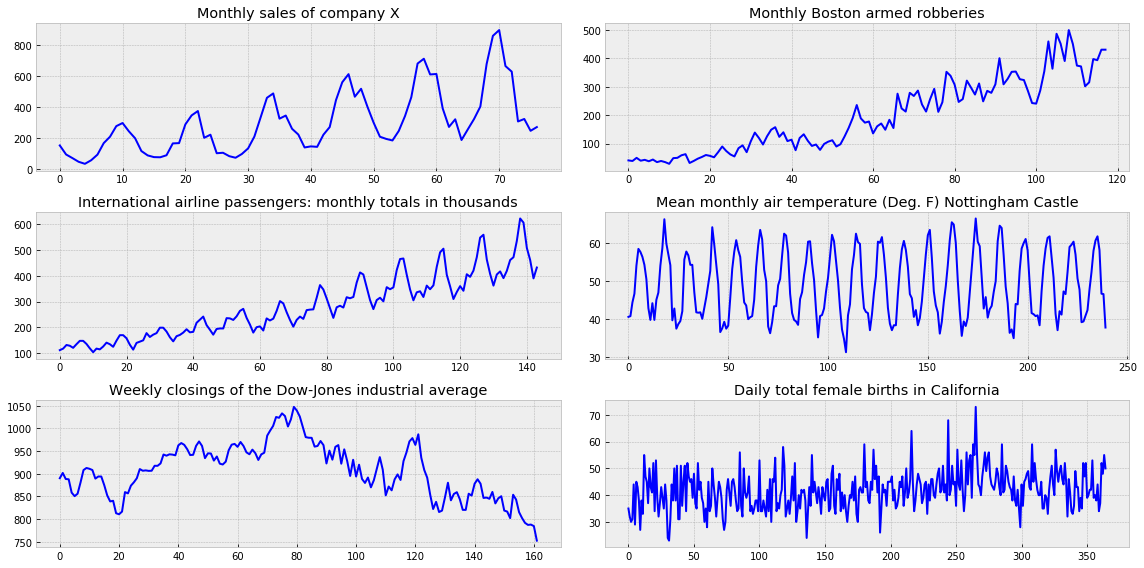

In [12]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Monthly sales of company X

In [299]:
sales_of_company_x_series = sales_of_company_x['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


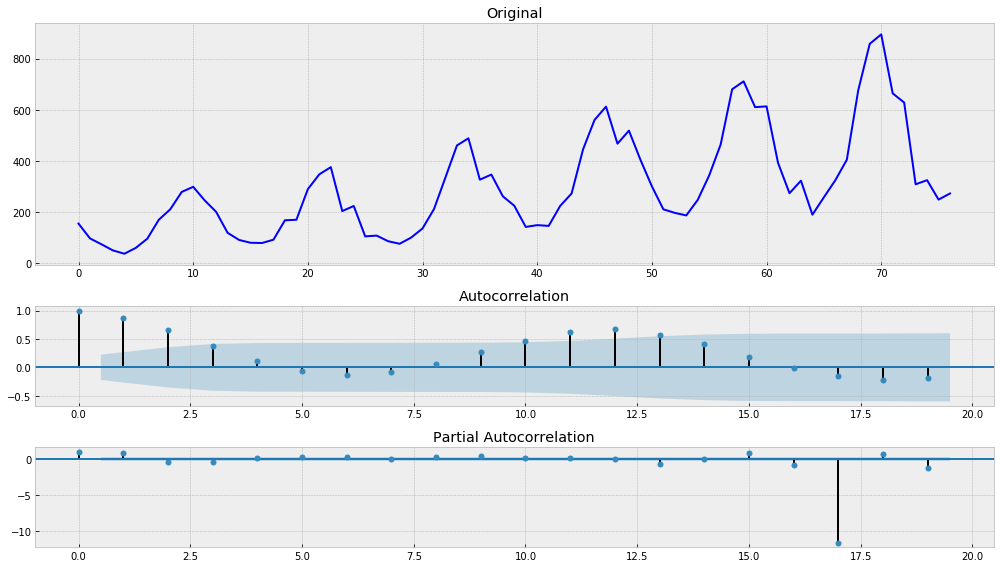

In [300]:
tsplot(sales_of_company_x_series)

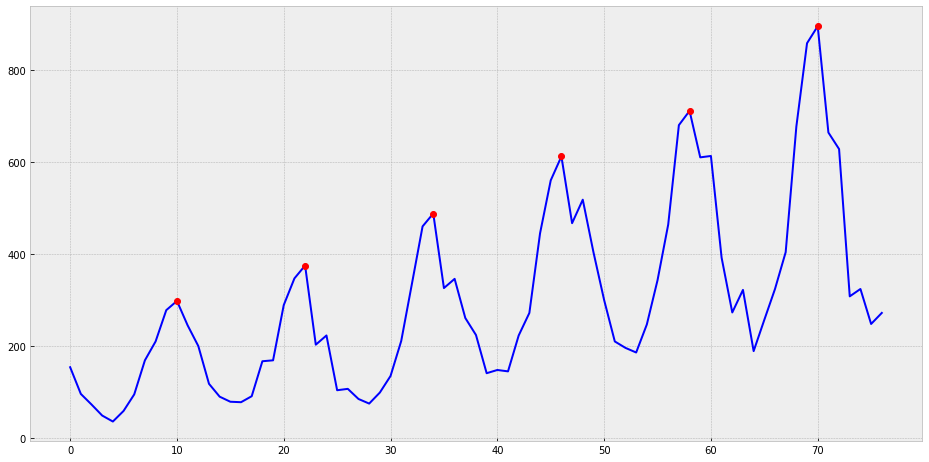

In [301]:
# Определим, что сезонность имеет период 12

plot_ts_and_points(sales_of_company_x_series, 10, 12)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


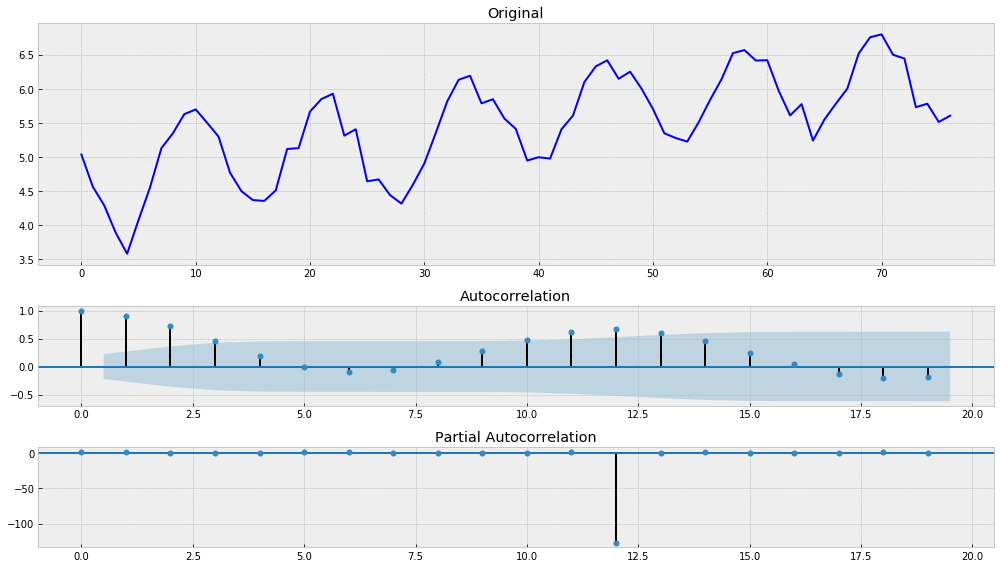

In [302]:
# Применим метом Бокса-Кокса чтобы нормализировать дисперсию и видим, что Test Statistic стала лучше (стала меньше 0)

sales_of_company_x_series = boxcox(sales_of_company_x_series, 0)

tsplot(sales_of_company_x_series)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


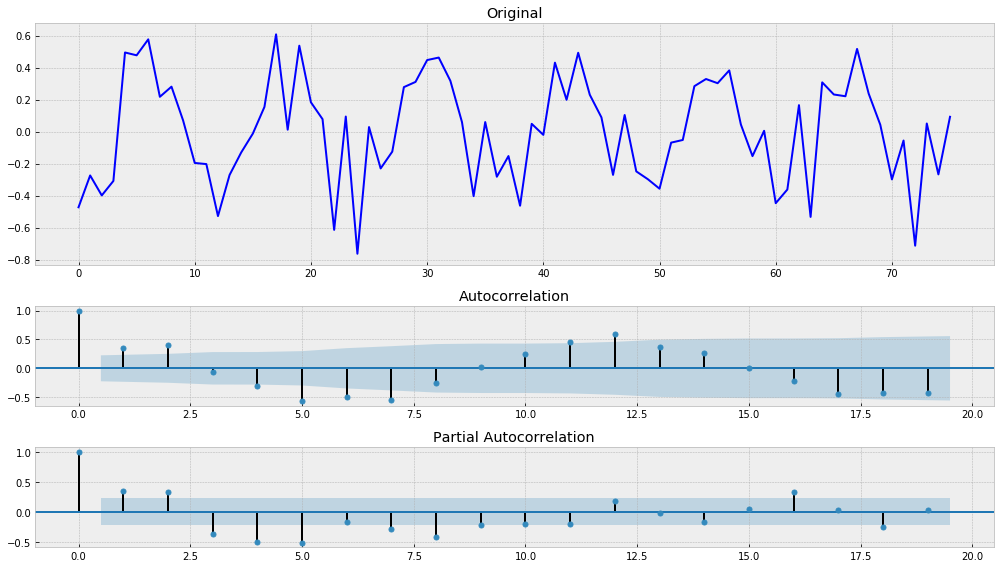

In [303]:
# Уберем тренд и также видим, что Test Statistic теперь равна -3.135644 и тем самым меньше доверительного интервала в 5% (-2.907887)

sales_of_company_x_series = sales_of_company_x_series[1:] - sales_of_company_x_series[:-1]

tsplot(sales_of_company_x_series)

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


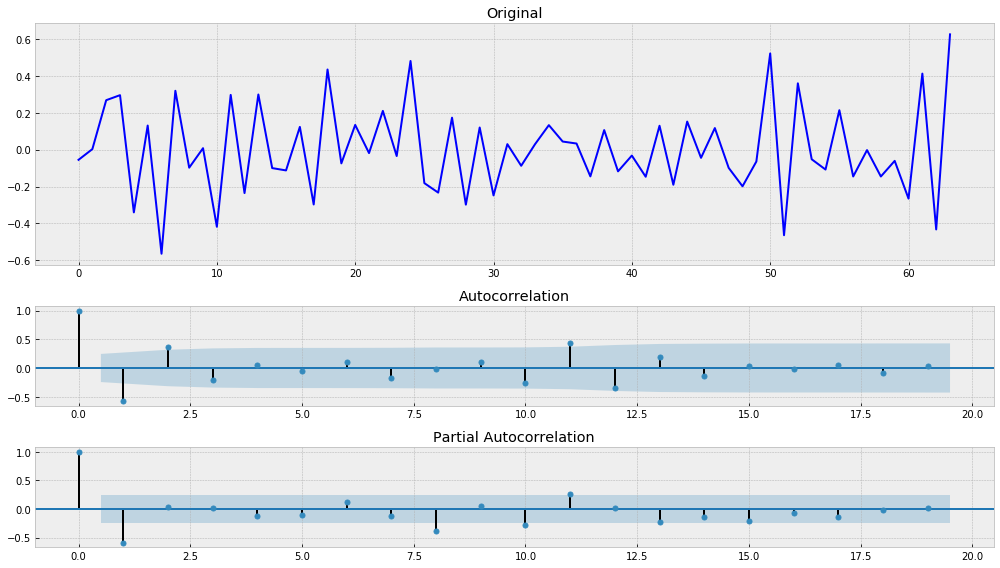

In [304]:
# На этом этапе у меня возникла проблема, так как ранее выявили сезонность и если ее убрать, то показание теста становится хуже

# Test Statistic на предыдущем шаге -3.135644 и после того как убираем сезонность она становится -2.316045, 
# то есть ряд стал менее стационарным

# В чем ошибка?


sales_of_company_x_series = sales_of_company_x_series[12:] - sales_of_company_x_series[:-12]

tsplot(sales_of_company_x_series)

# Monthly Boston armed robberies

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


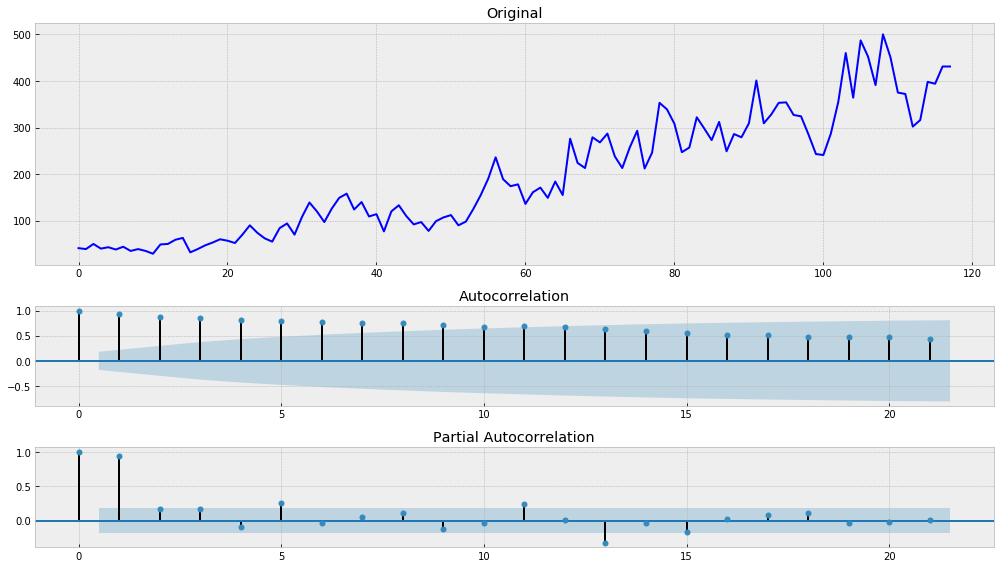

In [205]:
robberies_in_boston_series = robberies_in_boston['Count']

tsplot(robberies_in_boston_series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


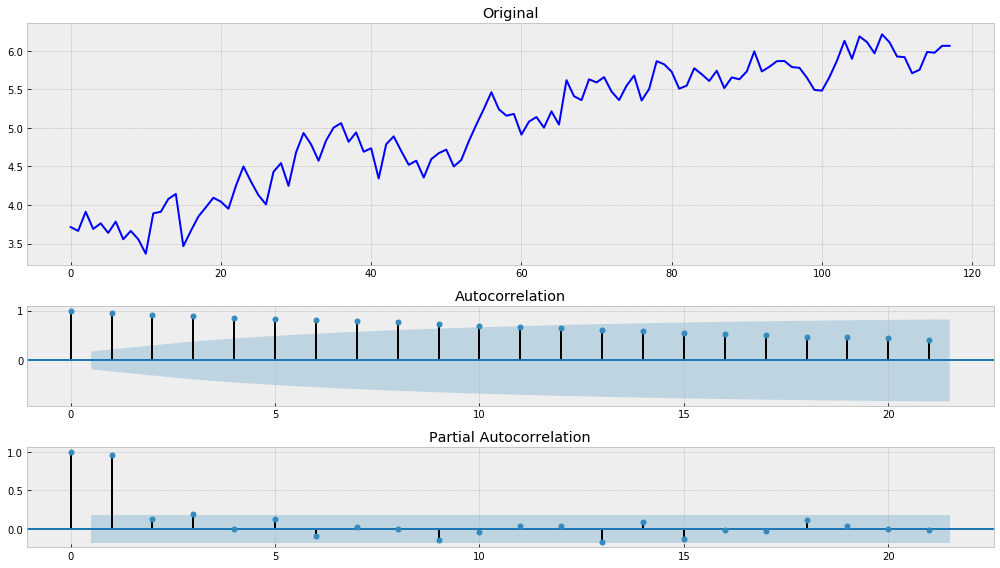

In [206]:
# Применяем метод Бокса-Кокса

robberies_in_boston_series = boxcox(robberies_in_boston_series, 0)

tsplot(robberies_in_boston_series)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


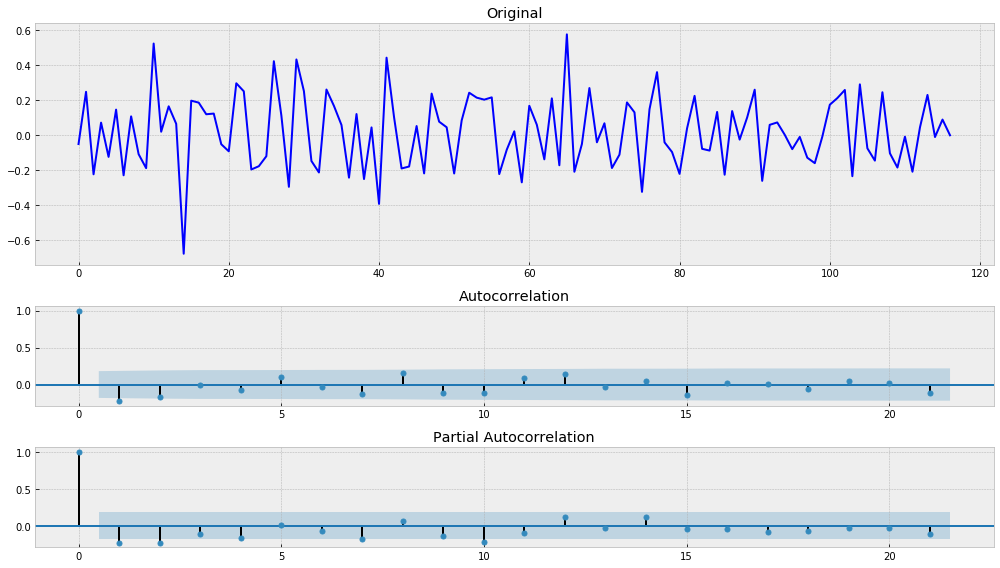

In [207]:
# Убираем тренд и наш ряд становится стационарным (Test Statistic меньше чем доверительный интервал 1%)

robberies_in_boston_series = robberies_in_boston_series[1:] - robberies_in_boston_series[:-1]

tsplot(robberies_in_boston_series)

# International airline passengers: monthly totals in thousands

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


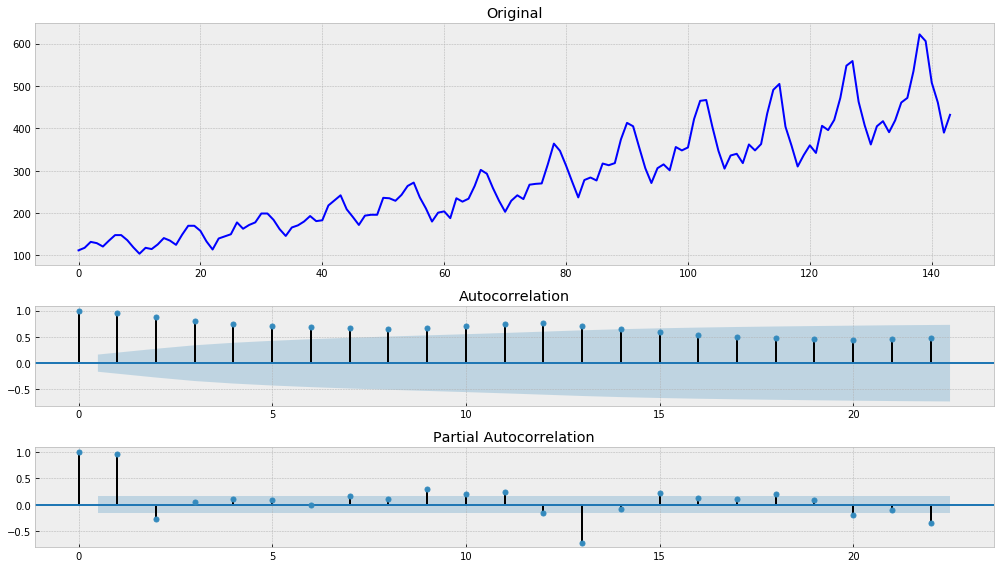

In [152]:
airlines_passengers_series = airlines_passengers['Count']

tsplot(airlines_passengers_series)

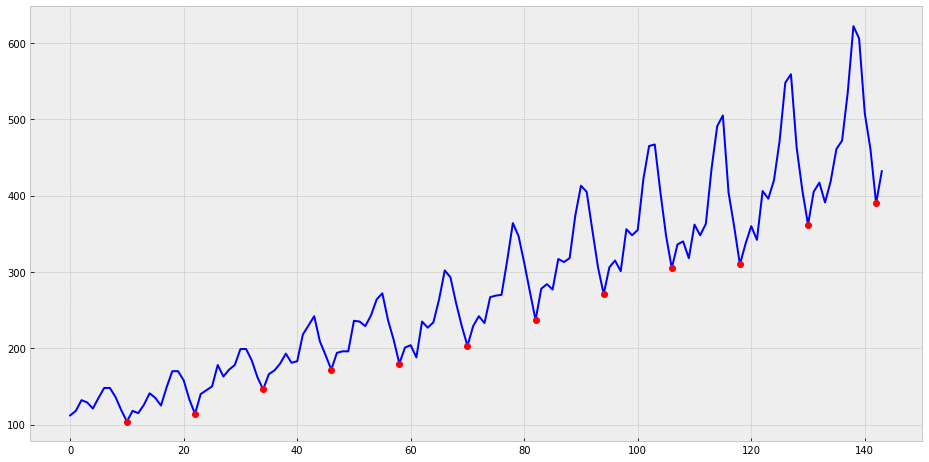

In [153]:
# Находим тренд с периодичностью 12

plot_ts_and_points(airlines_passengers_series, 10, 12)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


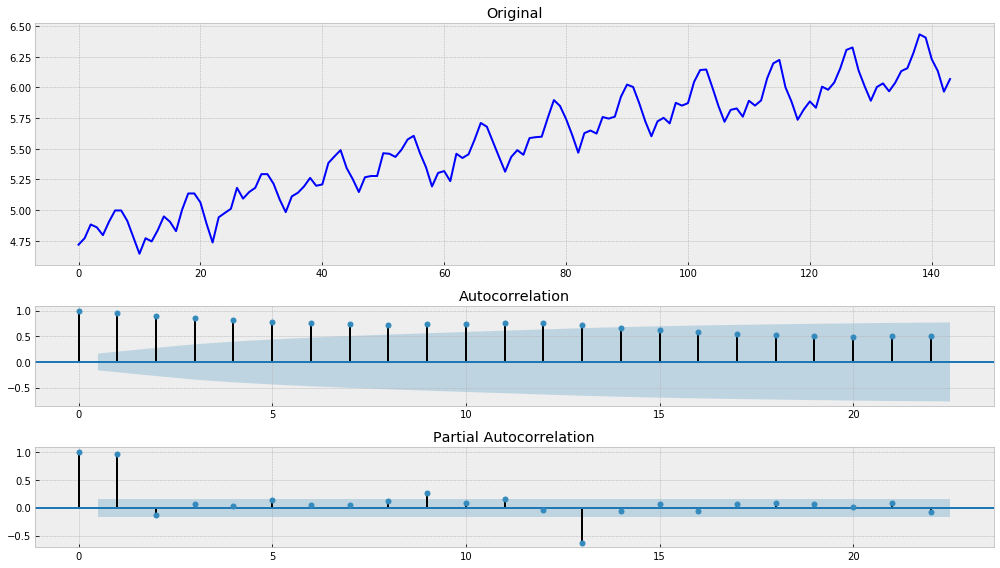

In [154]:
# Применяем метод Бокса-Кокса

airlines_passengers_series = boxcox(airlines_passengers_series, 0)

tsplot(airlines_passengers_series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


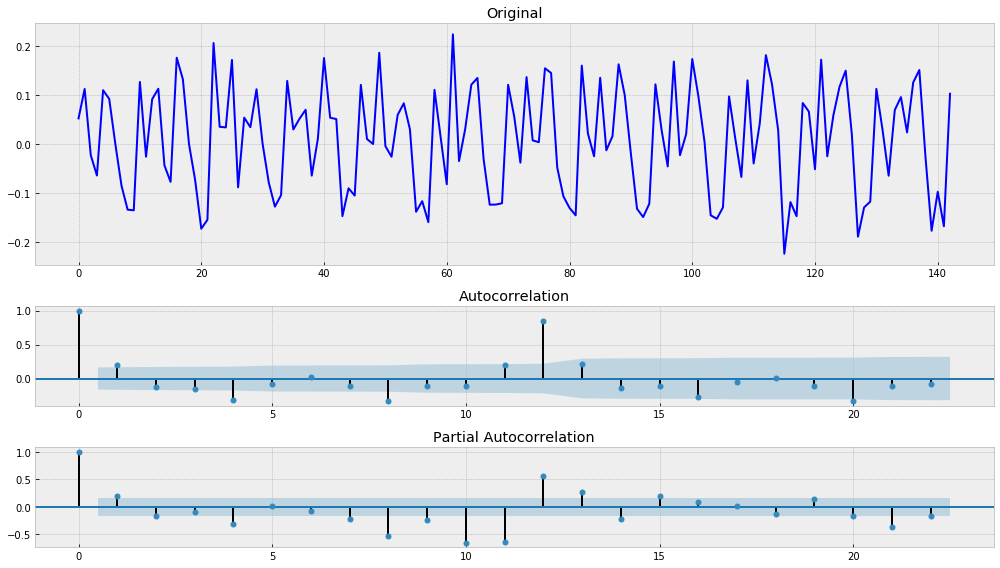

In [155]:
# Убираем тренд

airlines_passengers_series = airlines_passengers_series[1:] - airlines_passengers_series[:-1]

tsplot(airlines_passengers_series)

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


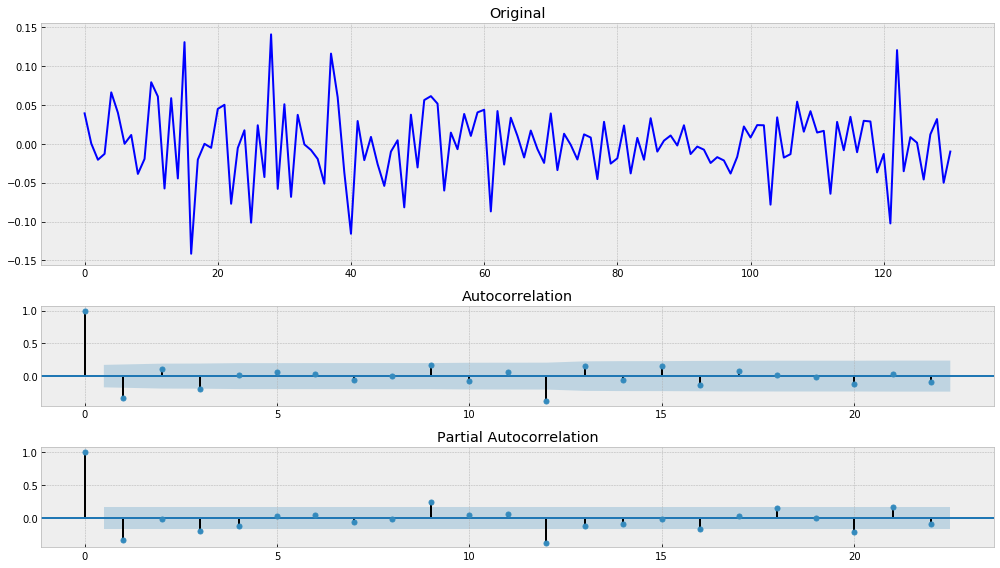

In [156]:
# Убираем сезонность и получаем стационарный ряд (Test Statistic меньше чем доверительный интервал 1%)

airlines_passengers_series = airlines_passengers_series[12:] - airlines_passengers_series[:-12]

tsplot(airlines_passengers_series)

# Mean monthly air temperature (Deg. F) Nottingham Castle

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


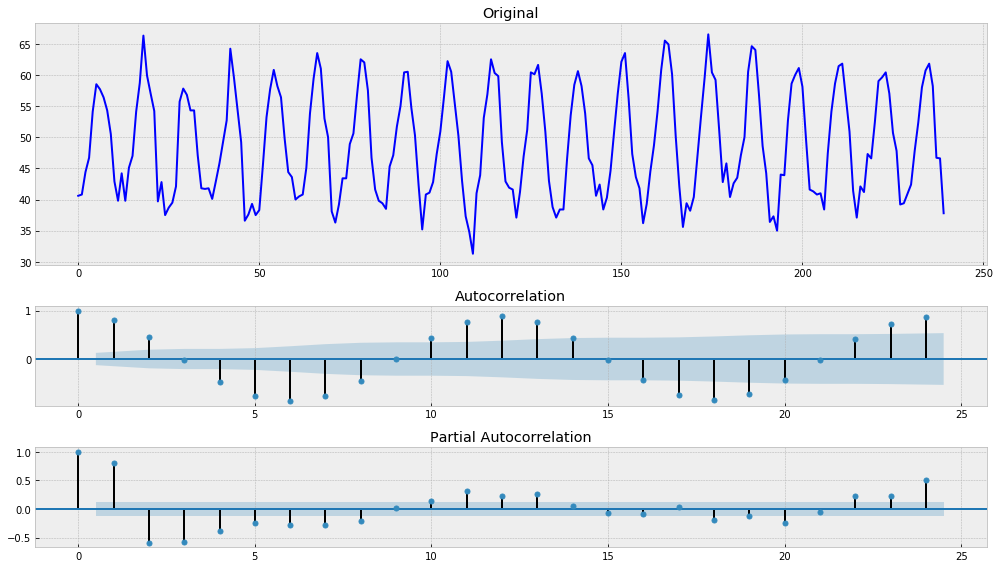

In [191]:
mean_monthly_temp_series = mean_monthly_temp["Deg"]

tsplot(mean_monthly_temp_series)

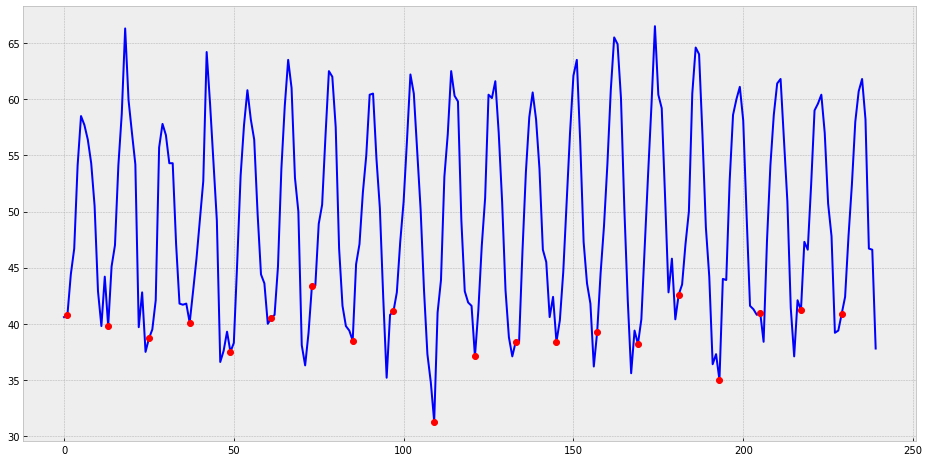

In [182]:
# Определяем сезонность с периодом 12

plot_ts_and_points(mean_monthly_temp_series, 1, 12)

Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


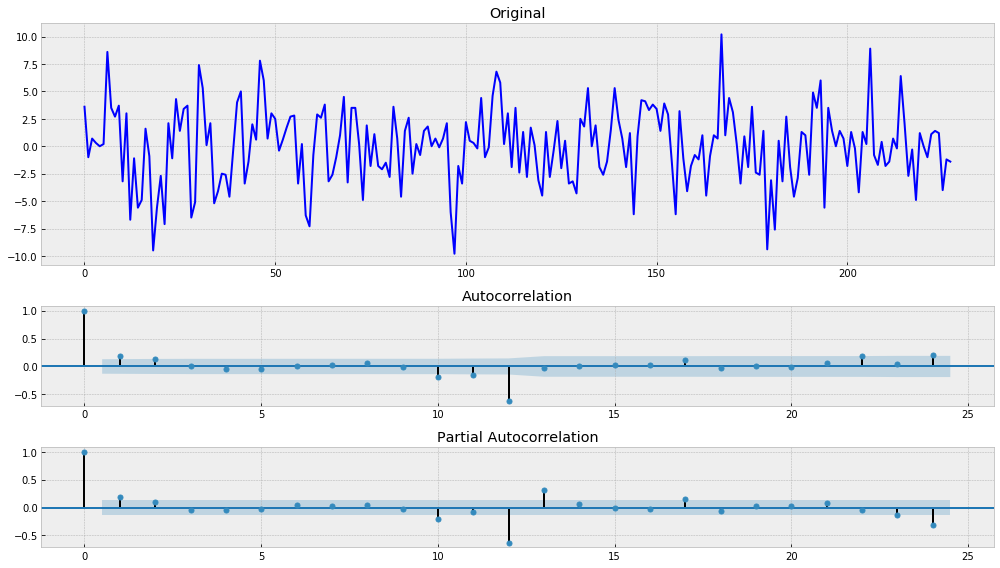

In [196]:
# Через series = series[12:] - series[:-12] получал ошибку поэтому нашел следующую функцию в интернете для вычета сезонности

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

diff = difference(mean_monthly_temp_series, 12)

# Получаем стационарный ряд
tsplot(diff)

# Weekly closings of the Dow-Jones industrial average

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


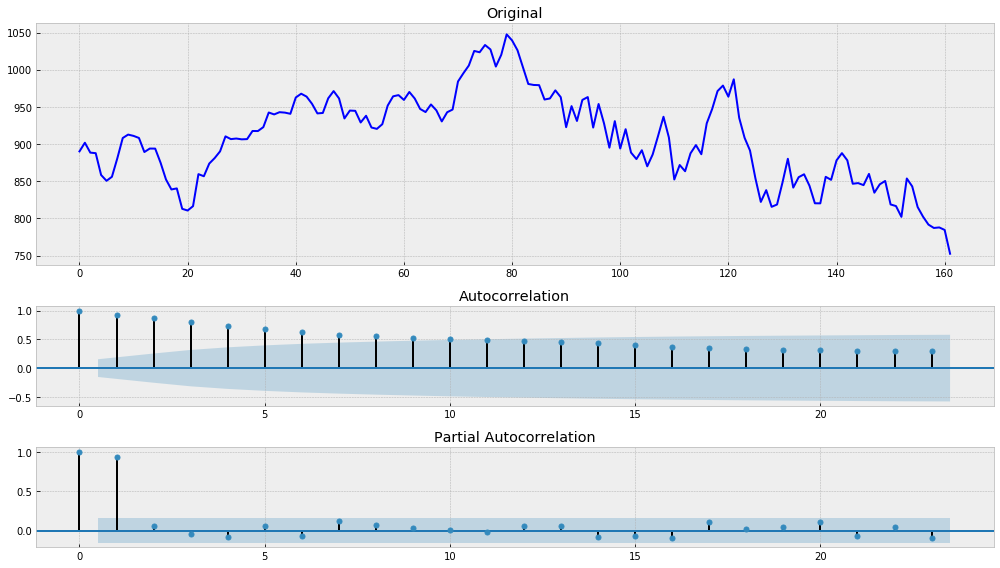

In [305]:
dowjones_closing_series = dowjones_closing["Close"]

tsplot(dowjones_closing_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


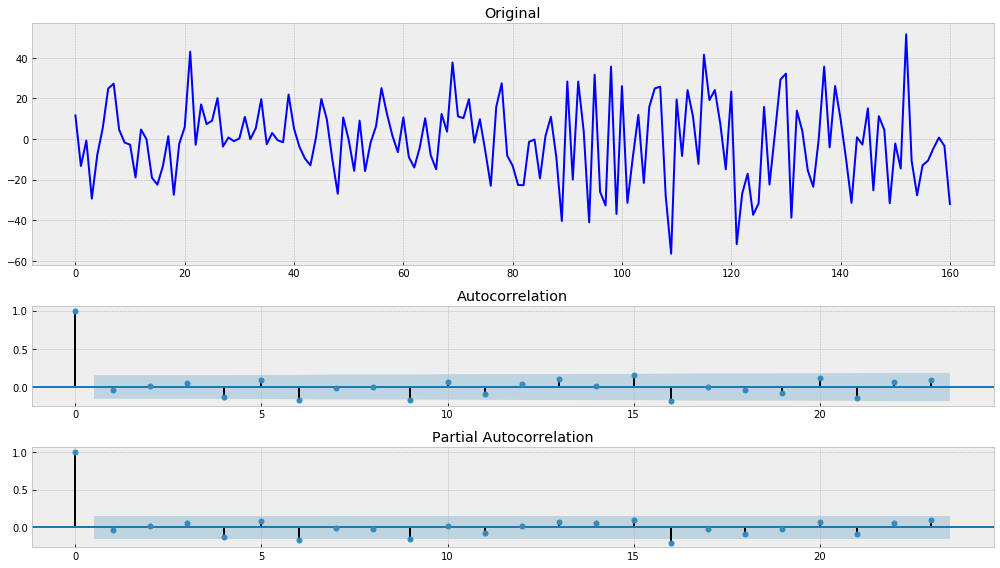

In [293]:
# Пробуем убрать тренд
# Через series = series[1:] - series[:-1] получал ошибку поэтому применил следующую функцию

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

dowjones_closing_series = difference(dowjones_closing_series, 1)

# Ряд стал более стационарным
tsplot(dowjones_closing_series)

**Вопрос**  
В интернете (https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/) прочитал про амтоматический интсрумент декомпозиции seasonal_decompose и применил его к данному временному ряду с параметром model='multiplicative', т.е. то что модель не линейная и seasonal_decompose, кажется, неплохо разложил на ряд на трендовую и сезонность (см. ниже)

**Как правильно убрать сезонность и тренд, которые нелинейные?**  
Если применить series = series[52:] - series[:-52] то получается ерунда
 

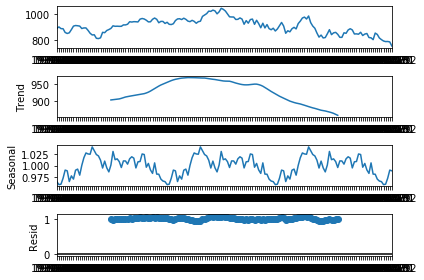

In [295]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = pd.read_csv('weekly-closings-of-the-dowjones-.csv', header=0, index_col=0)

result = seasonal_decompose(series, model='multiplicative', period=52)

result.plot()
pyplot.show()

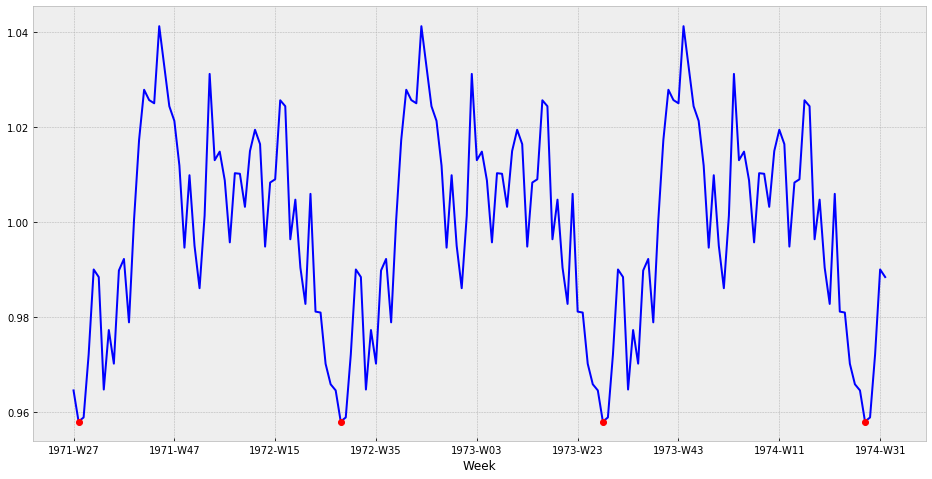

In [298]:
# Если взять неленейный сезонный компонент из seasonal_decompose и попробовать найти тренд, то он будет равен 52 неделям
plot_ts_and_points(result.seasonal, 1, 52)

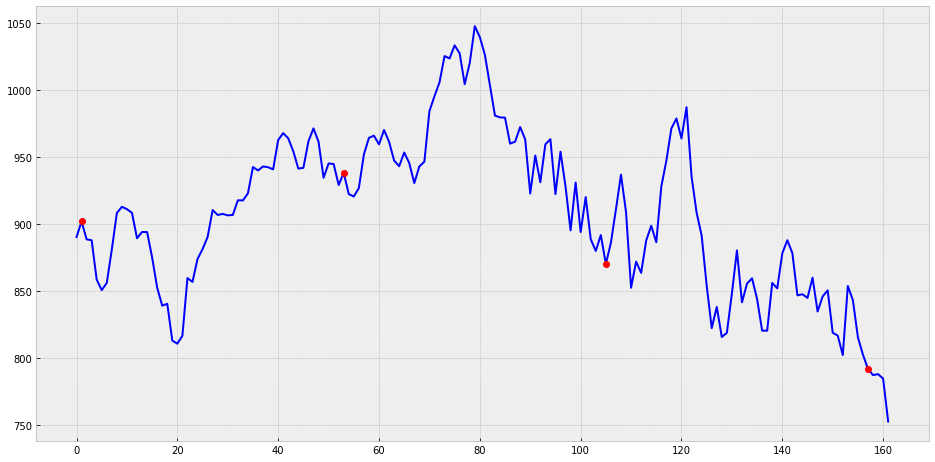

In [306]:
# Но если попробовать найти эту сезонность на изначальном ряду, то ее нет

plot_ts_and_points(dowjones_closing_series, 1, 52)

# Daily total female births in California

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


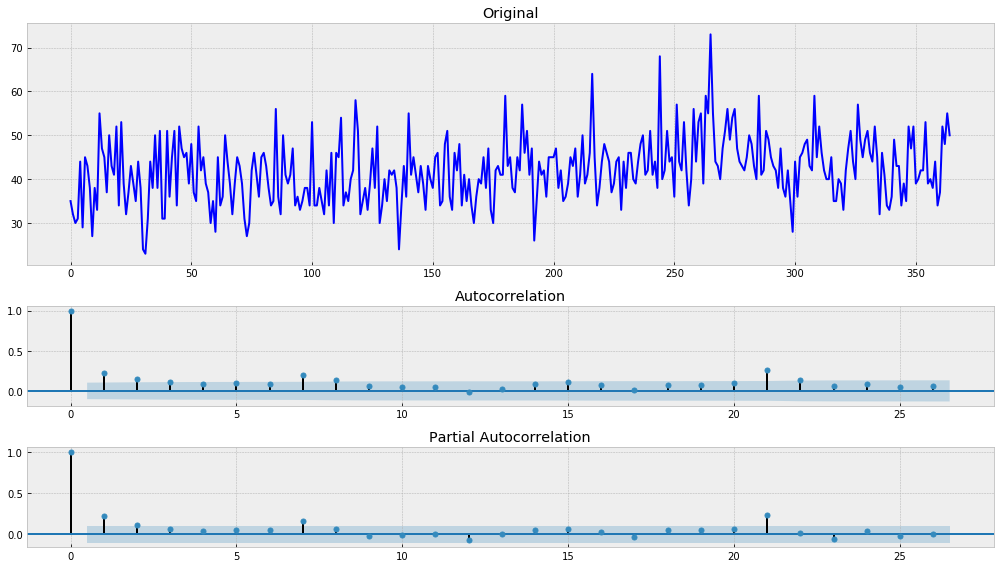

In [255]:
# Ряд изначально стационарный

female_births = female_births["Count"]

tsplot(female_births)